# Homografía: Corrección de perspectiva

A partir de ocho puntos (cuatro de la imagen original, y cuatro de la imagen destino), se corregirá la perspectiva de una imagen.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

Cargamos la imagen en img, y la escalamos a 1/4 de su tamaño original. 

Nota: OpenCV carga la imagen en un formato BGR; en lugar de RGB, por lo que hay que modificar la imagen para mostrar 

Tamaño de imagen: 
img:  (2206, 3309, 3)  img_rs:  (552, 827, 3)


(<matplotlib.image.AxesImage at 0x7fbf86698290>,
 <matplotlib.text.Text at 0x7fbf8671cdd0>)

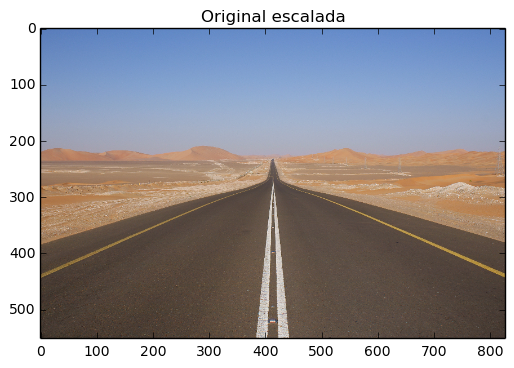

In [47]:
#Cargamos la imagen deseada
img = cv2.imread("imgs/road.jpg")

#Indicamos la escala a la que se reducirá.... 1/scale
scale = 4

#Escalamos la imagen
img_rs = cv2.resize(img, None, fx=1./scale, fy=1./scale, interpolation=cv2.INTER_LANCZOS4)

print "Tamaño de imagen: \nimg: ",img.shape," img_rs: ", img_rs.shape

b,g,r = cv2.split(img_rs)
img_rs = cv2.merge([r,g,b]) 

plt.imshow(img_rs),plt.title('Original escalada')

Seleccionamos los cuatro puntos que encierran la región de interes en la imagén original (pts1), y seleccionamos los cuatro puntos que representan el lugar dónde estarán en la imagen corregida (pts2).

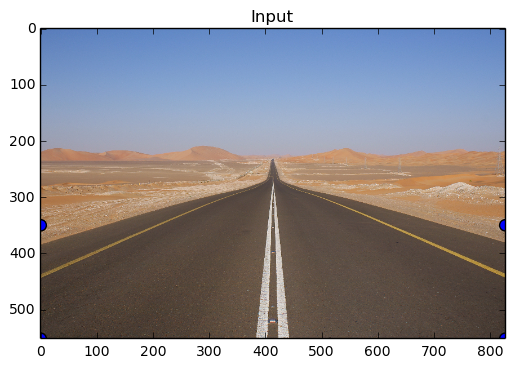

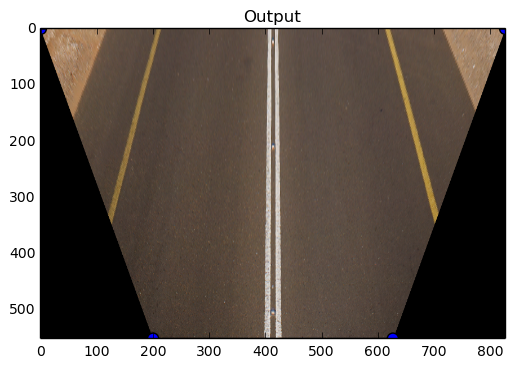

In [50]:
#Homografía
rows = img_rs.shape[0]; cols = img_rs.shape[1]

#Seleccionamos cuatro puntos usando un arreglo de numpy
pts1 = np.float32([[0,350],[0,rows],[cols,350],[cols,rows]])

#Mostramos la imagen escalada
fig,ax = plt.subplots(1)
ax.imshow(img_rs),plt.title('Input')

#Dibujamos pts1 en la imagen escalada
for pts in pts1:
    circ = plt.Circle(pts,10)
    ax.add_patch(circ)

#Seleccionamos cuatro putnos de destino
x = 200
pts2 = np.float32([[0,0],[x,rows],[cols,0],[cols-x,rows]])

#Se calcula la matriz para la corrección de perspectiva
M = cv2.getPerspectiveTransform(pts1,pts2)

#Obtenemos la imagen con corrección de pespectiva
img_hom = cv2.warpPerspective(img_rs, M, (cols,rows))

#Mostramos la imagen resultante
fig1,ax1 = plt.subplots(1)
ax1.imshow(img_hom),plt.title('Output')

#Dibujamos pts2
for pts in pts2:
    circ = plt.Circle(pts,10)
    ax1.add_patch(circ)